# Hotel booking demand

### Context
* Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

### Content
* This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

#### Source of dataset : 
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount
https://www.sciencedirect.com/science/article/pii/S2352340918315191

Hi! Welcome to the notebook!

This notebook will serve as the step by step code explanation on how I analyse the Hotel booking demand dataset. My goal is to predict whether the visitor will cancel or will stay in the hotels based on the number of aspects (columns) in the dataset. The decision made based on the result will be summarized using powerpoint presentation. Please do let me know if you have any suggestions for the methods I'm using in this notebook!

# 1. Importing packages for machine learing uses

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE 

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import accuracy_score, recall_score, precision_score


# 2. Data Preprocessing

In [2]:
#read the datasets
hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
#print top 5 datasets values
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#type, and non null datasets
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 1.1 Data Explanation & Understanding

* `hotel`
Hotel (H1 = Resort Hotel or H2 = City Hotel)

* `is_canceled`
Value indicating if the booking was canceled (1) or not (0)

* `lead_time`
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date (Property Management System)

* `arrival_date_year`
Year of arrival date

* `arrival_date_month`
Month of arrival date

* `arrival_date_week_number`
Week number of year for arrival date

* `arrival_date_day_of_month`
Day of arrival date

* `stays_in_weekend_nights`
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* `stays_in_week_nights`
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* `adults`
Number of adults

* `children`
Number of children

* `babies`
Number of babies

* `meal`
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* `country`
Country of origin. Categories are represented in the ISO 3155–3:2013 format

* `market_segment`
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* `distribution_channel`
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* `is_repeated_guest`
Value indicating if the booking name was from a repeated guest (1) or not (0)

* `previous_cancellations`
Number of previous bookings that were cancelled by the customer prior to the current booking

* `previous_bookings_not_canceled`
Number of previous bookings not cancelled by the customer prior to the current booking

* `reserved_room_type`
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* `assigned_room_type`
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* `booking_changes`
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* `deposit_type`
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* `agent`
ID of the travel agency that made the booking

* `company`
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* `days_in_waiting_list`
Number of days the booking was in the waiting list before it was confirmed to the customer

* `customer_type`
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

* `adr`
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* `required_car_parking_spaces`
Number of car parking spaces required by the customer

* `total_of_special_requests`
Number of special requests made by the customer (e.g. twin bed or high floor)

* `reservation_status`
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

* `reservation_status_date`
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

--------------------------------------------------------------------------------------------------------------------------------
* ***Side Note:*** PMS stands for Property Management System. It is a software application that is used to manage different aspects of a property such as reservations, guest information, room assignments, billing, and reporting.

### 1.2 Cleaning the Dataset

In [5]:
#checking nulls
print("# of NaN in each columns:", hotel.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [6]:
#Missing value ratios
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(hotel, hotel['company']),
                                                                                   perc_mv(hotel, hotel['agent']),
                                                                                   perc_mv(hotel, hotel['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


In [7]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
hotel_cln = hotel.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
hotel_cln["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(hotel_cln.loc[hotel_cln["adults"]
                   + hotel_cln["children"]
                   + hotel_cln["babies"]==0].index)
hotel_cln.drop(hotel_cln.index[zero_guests], inplace=True)

In [8]:
#type, and non null datasets
hotel_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119206 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [9]:
#checking nulls
print("# of NaN in each columns:", hotel_cln.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
ad

We have 4 NA columns left in children, we will drop it because it has <5% values

In [10]:
hotel_cln = hotel_cln.dropna(subset=["children"])

In [11]:
#checking nulls
hotel_cln.isnull().values.any()

False

In [12]:
print(hotel_cln.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


### 1.3 Finding Corelation

* We already have function to determine corelation with df.coor. By default, df.corr() uses Pearson correlation coefficient, which measures the linear relationship between two numerical variables. But in this case we still have categorical values in our dataset, lets transform it into numerical and run df.coor to see which column that has highly corelation

In [13]:
# Lets copy data to check the correlation between variables. 
cor_data = hotel_cln.copy()

In [14]:
le = LabelEncoder()

In [15]:
# This data will not be used while predicting cancellation. This is just for checking correlation.
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [16]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917172
total_of_special_requests        -0.234925
required_car_parking_spaces      -0.195696
assigned_room_type               -0.175841
booking_changes                  -0.144821
is_repeated_guest                -0.083740
company                          -0.083588
customer_type                    -0.068276
reserved_room_type               -0.062218
previous_bookings_not_canceled   -0.057363
agent                            -0.046988
babies                           -0.032566
meal                             -0.015196
arrival_date_day_of_month        -0.005902
stays_in_weekend_nights          -0.001316
children                          0.004862
arrival_date_week_number          0.008299
arrival_date_year                 0.016694
stays_in_week_nights              0.025549
adr                               0.046558
days_in_waiting_list              0.054309
adults                            0.058155
market_segment                    0.059395
previous_ca

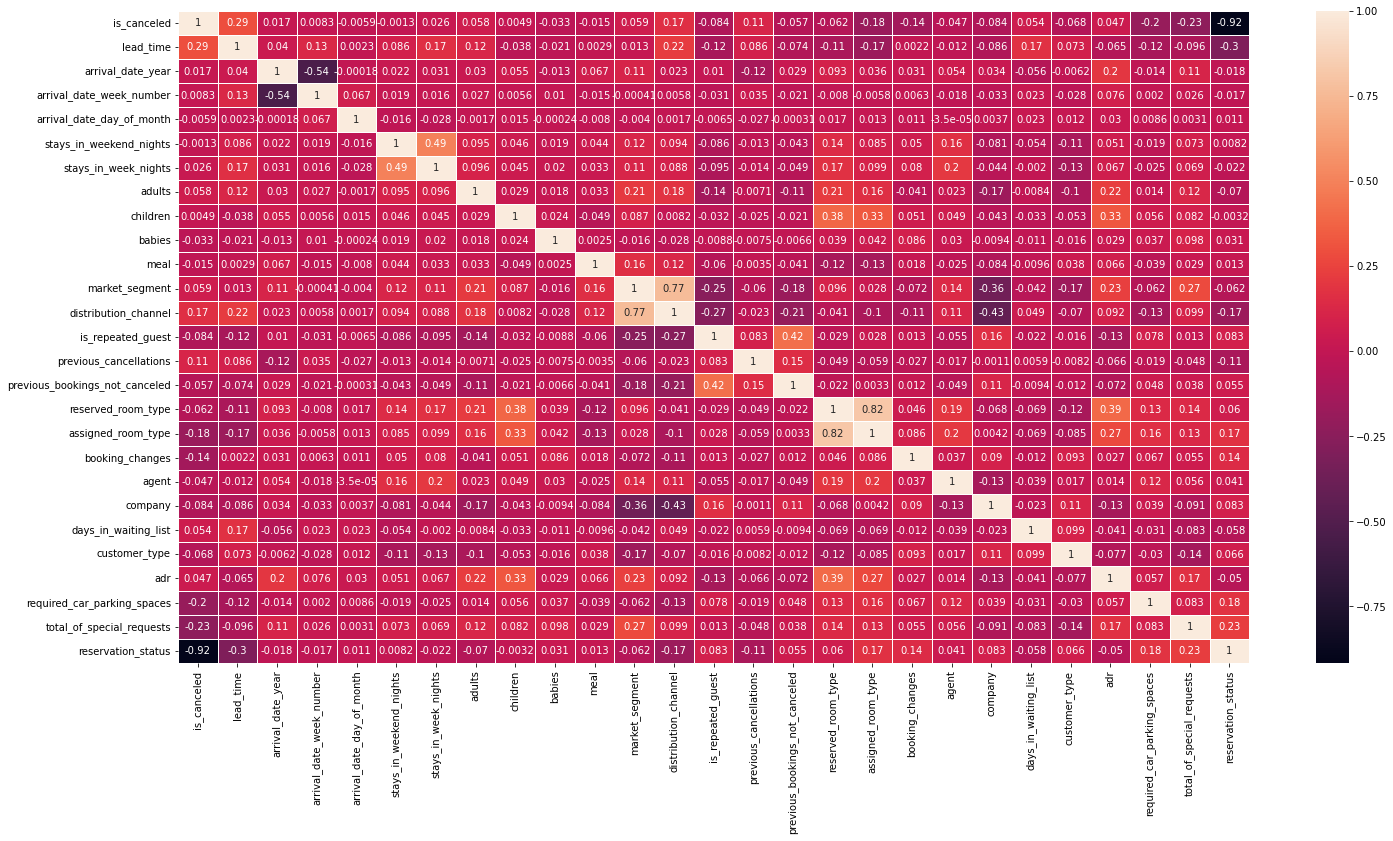

In [17]:
plt.figure(figsize = (24, 12))

corr = cor_data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

* As we can see in the sorted list, reservation_status seems to be most impactful feature. With that information accuracy rate should be really high. It can be better to drop `reservation_status` column to see how other features can predict. 

* Apart from that, I will not use `arrival_date_week_number`, `stays_in_weekend_night` and `arrival_date_day_of_month` since their importances are really low while predicting cancellations.

* In the Multiplecorrelation heatmap we will drop `distribution_channel` and `assigned_room_type` because its highly corelated with column `market_segment` and `reserved_room_type` to reduce potential overfitting in modeling


In [18]:
cor_data = cor_data.drop(columns = ['reservation_status', 'arrival_date_week_number', 
                                    'stays_in_weekend_nights', 'arrival_date_day_of_month',
                                    'distribution_channel','assigned_room_type'], axis = 1)

In [19]:
cor_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,0,2,0.0,0,0,...,3,No Deposit,0,0.0,0,2,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,0,2,0.0,0,0,...,4,No Deposit,0,0.0,0,2,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,1,1,0.0,0,0,...,0,No Deposit,0,0.0,0,2,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,1,1,0.0,0,0,...,0,No Deposit,221,0.0,0,2,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,2,2,0.0,0,0,...,0,No Deposit,174,0.0,0,2,98.0,0,1,2015-07-03


In [20]:
hotel_cln = hotel_cln.drop(columns = ['reservation_status', 'arrival_date_week_number', 
                                    'stays_in_weekend_nights', 'arrival_date_day_of_month',
                                    'distribution_channel','assigned_room_type'], axis = 1)

#### Applying to real dataset

In [21]:
hotel_cln

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,0,2,0.0,0,BB,...,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,0,2,0.0,0,BB,...,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,1,1,0.0,0,BB,...,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,1,1,0.0,0,BB,...,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,2,2,0.0,0,BB,...,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,5,2,0.0,0,BB,...,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,2017-09-06
119386,City Hotel,0,102,2017,August,5,3,0.0,0,BB,...,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,2017-09-07
119387,City Hotel,0,34,2017,August,5,2,0.0,0,BB,...,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,2017-09-07
119388,City Hotel,0,109,2017,August,5,2,0.0,0,BB,...,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,2017-09-07


# 3.EDA Section

### 1. Where the guest come from?

In [22]:
country_guests_percent = hotel_cln[hotel_cln['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests_percent.columns = ['country', 'No of guests']
country_guests_percent.head()

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


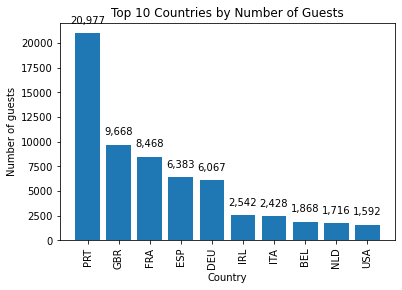

In [23]:
import matplotlib.pyplot as plt

# Calculate total number of guests
total_guests = country_guests_percent['No of guests'].sum()

# Create a barplot of the top 10 countries by number of guests
top_countries = country_guests_percent.head(10)
percentages = top_countries['No of guests'] / total_guests * 100
labels = [f"{country} ({percent:.1f} %)" for country, percent in zip(top_countries['country'], percentages)]
plt.bar(top_countries['country'], top_countries['No of guests'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title('Top 10 Countries by Number of Guests')
for i, v in enumerate(top_countries['No of guests']):
    plt.text(i, v + 1000, f"{v:,}", ha='center')
plt.show()


As we can see in the pie chart the top 5 country that visited our hotels are from:
* Portugal
* Uk (United Kingdom)
* France
* Spain
* Germany

So we can draw a conclusion that most people from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

### 2. Number of guests per month

In [24]:
data_resort = hotel_cln[(hotel_cln['hotel'] == 'Resort Hotel') & (hotel_cln['is_canceled'] == 0)]
data_city = hotel_cln[(hotel_cln['hotel'] == 'City Hotel') & (hotel_cln['is_canceled'] == 0)]

In [25]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [26]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [27]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['Month','Number of guests in resort','Number of guests in city hotel']
final_guests

,Month,Number of guests in resort,Number of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


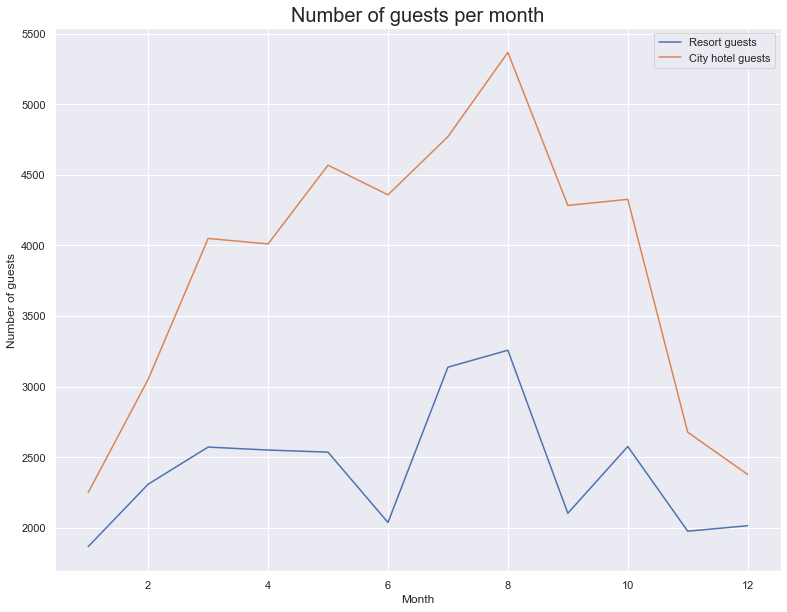

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

months = {'April': 4, 'August': 8, 'December': 12, 'February': 2, 'January': 1, 'July': 7, 'June': 6, 'March': 3, 'May': 5, 'November': 11, 'October': 10, 'September': 9}

final_guests['Month'] = final_guests['Month'].map(months)
final_guests = final_guests.sort_values(by='Month')

sns.set(style="darkgrid")

plt.figure(figsize=(13, 10))
plt.title("Number of guests per month", fontdict={'fontsize': 20})

sns.lineplot(x='Month', y='Number of guests in resort', data=final_guests, label='Resort guests')
sns.lineplot(x='Month', y='Number of guests in city hotel', data=final_guests, label='City hotel guests')

plt.xlabel("Month")
plt.ylabel("Number of guests")
plt.legend()
plt.show()


* From the following table we can see that the middle of the year (August, July , May, October, April, June, September) is a very busy month with customers, this is likely because in Europe it is summer and most people have holidays

### 3. Total night spends by guests

In [29]:
filter = hotel['is_canceled'] == 0
data = hotel[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [31]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number_of_stays'})
stay

,total_nights,hotel,Number_of_stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


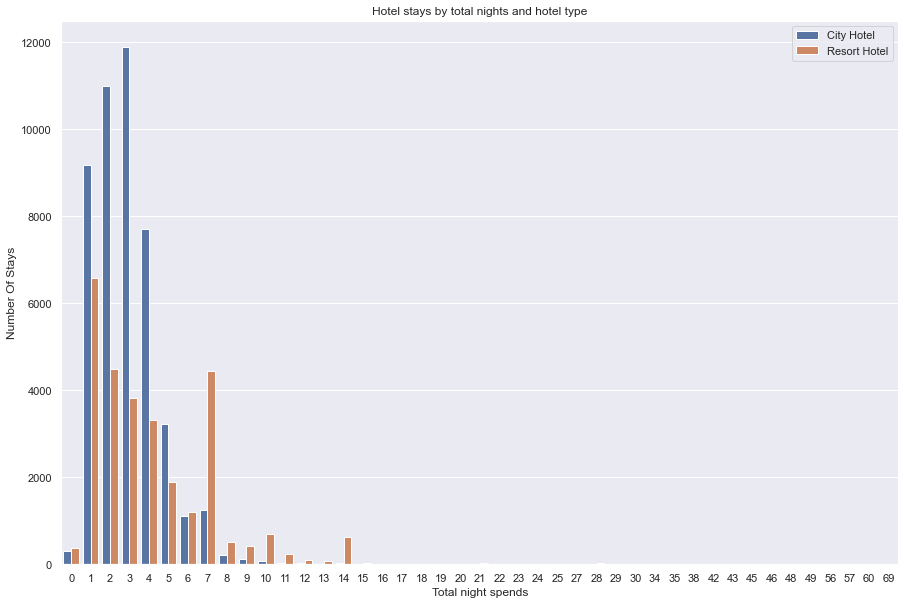

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='total_nights', y='Number_of_stays', hue='hotel', data=stay)

# Add labels and title
plt.xlabel("Total night spends")
plt.ylabel("Number Of Stays")
plt.title("Hotel stays by total nights and hotel type")
plt.legend(loc='upper right')

# Show the plot
plt.show()

* In this bar plot we can see that most of the customers use city hotels compared to resort hotels and the average customer books hotels for a period of 1-14 days with peak bookings for resort hotels for 1 day and city hotels for 3 days.

### 4. Price per month

In [33]:
data_resort = hotel_cln[(hotel_cln['hotel'] == 'Resort Hotel') & (hotel_cln['is_canceled'] == 0)]
data_city = hotel_cln[(hotel_cln['hotel'] == 'City Hotel') & (hotel_cln['is_canceled'] == 0)]

In [34]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel = resort_hotel.sort_values(by='adr',ascending=False)
resort_hotel

,arrival_date_month,adr
1,August,181.205892
5,July,150.122528
6,June,107.974850
11,September,96.416860
8,May,76.657558
0,April,75.867816
2,December,68.410104
10,October,61.775449
7,March,57.056838
3,February,54.147478


In [35]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = city_hotel.sort_values(by='adr',ascending=False)
city_hotel

,arrival_date_month,adr
8,May,120.669827
1,August,118.674598
6,June,117.874360
5,July,115.818019
11,September,112.776582
0,April,111.962267
10,October,102.004672
7,March,90.658533
2,December,88.401855
9,November,86.946592


In [36]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel = final_hotel.sort_values(by='price_for_resort',ascending=False)
final_hotel

,month,price_for_resort,price_for_city_hotel
0,August,181.205892,118.674598
1,July,150.122528,115.818019
2,June,107.974850,117.874360
3,September,96.416860,112.776582
4,May,76.657558,120.669827
5,April,75.867816,111.962267
6,December,68.410104,88.401855
7,October,61.775449,102.004672
8,March,57.056838,90.658533
9,February,54.147478,86.520062


In [37]:
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
final_hotel = final_hotel.sort_values(by='month')

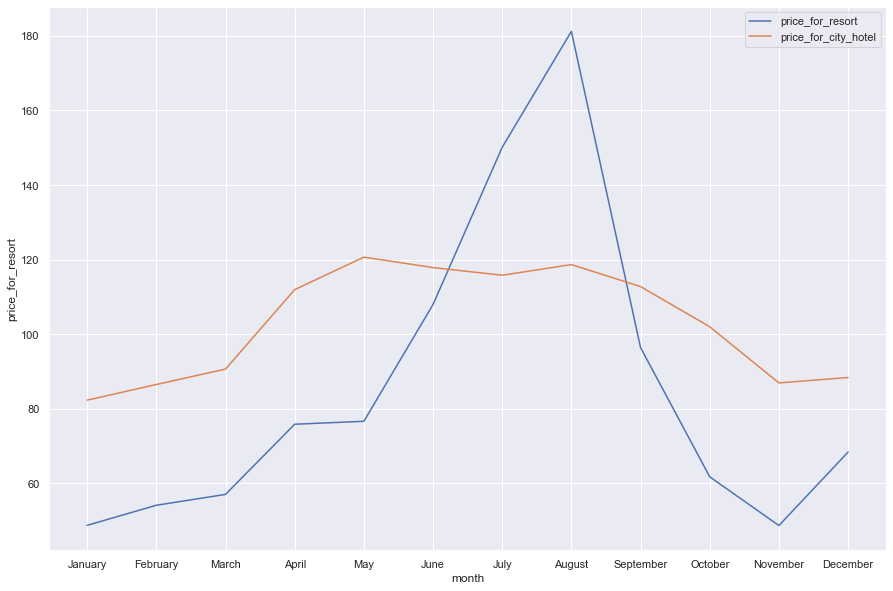

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))
final_hotel = final_hotel.sort_values(by='month')
sns.lineplot(x='month', y='price_for_resort', data=final_hotel)
sns.lineplot(x='month', y='price_for_city_hotel', data=final_hotel)
plt.legend(['price_for_resort','price_for_city_hotel'])
plt.show()

* From the graph above, we can see that at the beginning of the year there was a significant increase from January, rising to May and then there was a sharp increase from June to September and starting to decline from October to November. The increase again occurred in November to December.

### 5. Cancelation per month

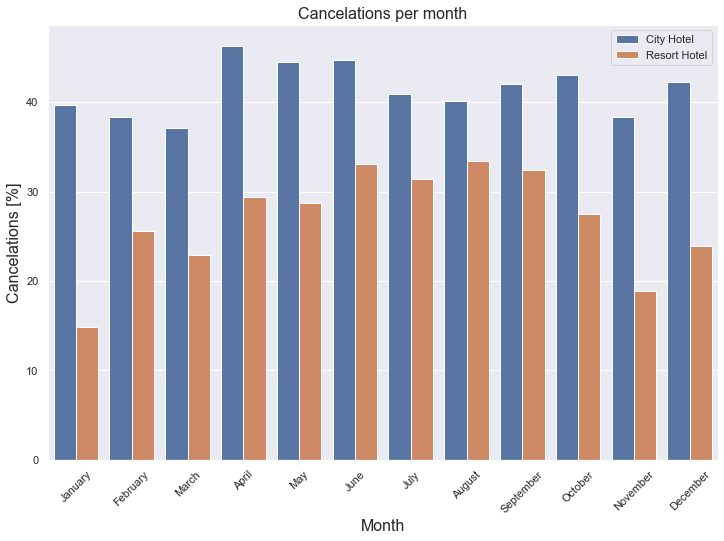

In [39]:
# Create a DateFrame with the relevant data:
res_book_per_month = hotel_cln.loc[(hotel_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = hotel_cln.loc[(hotel_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = hotel_cln.loc[(hotel_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = hotel_cln.loc[(hotel_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

* Most cancellations occur at city hotels compared to resort hotels, city hotels have an average cancellation rate of up to 40% and resort hotels have a fluctuating cancellation rate, increasing in summer and decreasing in winter

### 6. Bookings by market segment

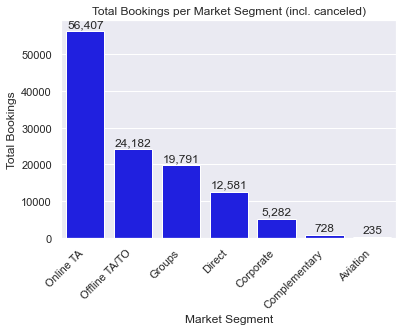

In [40]:
# Get total bookings per market segment (incl. canceled)
segments = hotel_cln["market_segment"].value_counts()

# Create a barplot of the market segments
sns.barplot(x=segments.index, y=segments.values, color="blue")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Market Segment')
plt.ylabel('Total Bookings')
plt.title('Total Bookings per Market Segment (incl. canceled)')
for i, v in enumerate(segments.values):
    plt.text(i, v + 1000, f"{v:,}", ha='center')
plt.show()


* From the following pie chart, online bookings are mostly made by Tour Agency, followed by offline bookings and group bookings.

### 7. How categoricals influence cancelation?

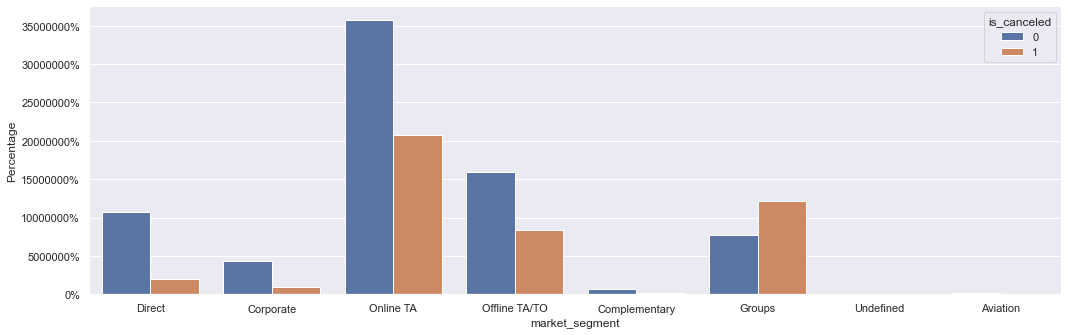

In [41]:
# set target variable (subscribed) as hue
# to understand the different behaviors of each of the features based on subscribe value
import matplotlib.ticker as mtick
# categorical features
# excluding high cardinal features for readability
selected_categoricals = ['market_segment']

plt.figure(figsize=(15,9))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    ax = sns.countplot(x=hotel[features[i-1]], hue=hotel['is_canceled'])
    ax.set_ylabel('Percentage')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(0.1))
    plt.xlabel(features[i-1])
    plt.tight_layout()


Text(0, 0.5, 'Percentage')

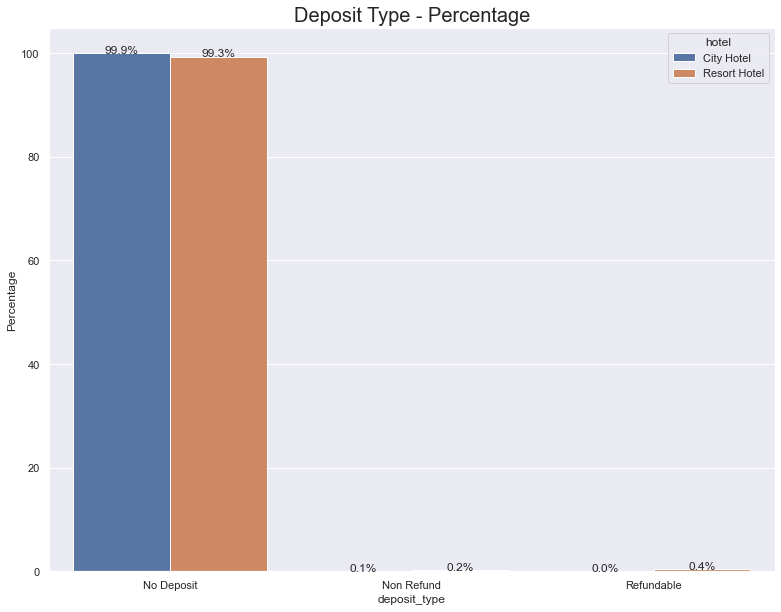

In [42]:
import numpy as np

plt.figure(figsize=(13, 10))
sns.set(style="darkgrid")
plt.title("Deposit Type - Percentage", fontdict={'fontsize': 20})

# Get the percentage of each deposit type for each hotel
g = data.groupby(["hotel", "deposit_type"]).size().reset_index(name="counts")
g["percentage"] = 100 * g["counts"] / g.groupby(["hotel"])["counts"].transform("sum")

# Make the bar plot
ax = sns.barplot(x="deposit_type", y="percentage", hue="hotel", data=g)

# Display the percentage value on top of each bar
for patch, pct in zip(ax.patches, g["percentage"]):
    x = patch.get_x() + patch.get_width() / 2
    height = patch.get_height()
    ax.text(x, height, '{:.1f}%'.format(pct), ha='center')

plt.ylabel("Percentage")


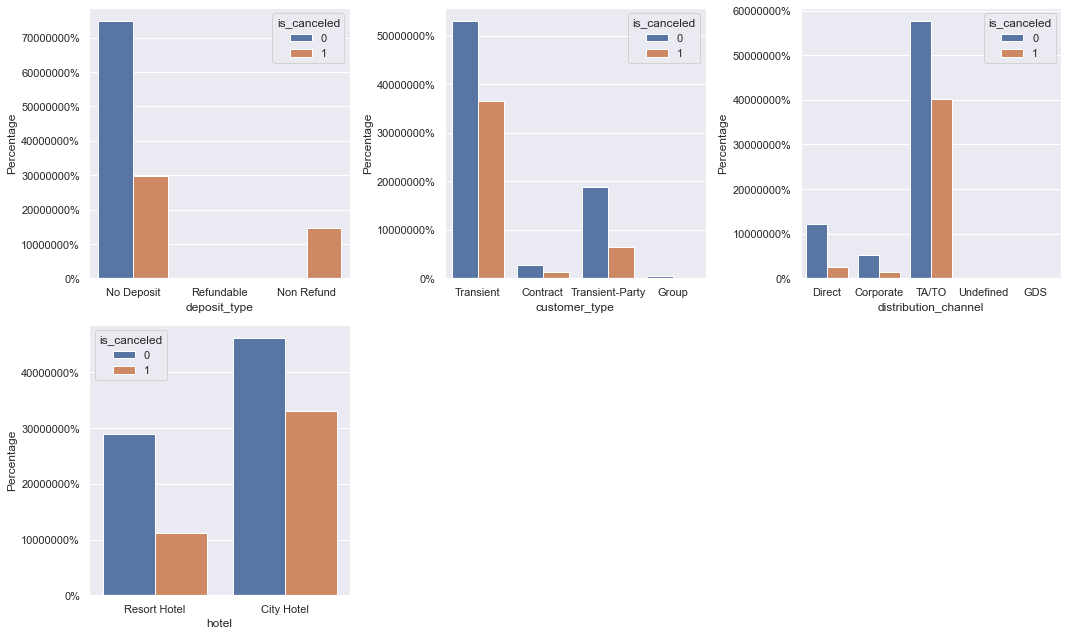

In [43]:
# set target variable (subscribed) as hue
# to understand the different behaviors of each of the features based on subscribe value

# categorical features
# excluding high cardinal features for readability
import matplotlib.ticker as mtick

selected_categoricals = ['deposit_type', 'customer_type','distribution_channel','hotel']

plt.figure(figsize=(15,9))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    ax = sns.countplot(x=hotel[features[i-1]], hue=hotel['is_canceled'])
    ax.set_ylabel('Percentage')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(0.1))
    plt.xlabel(features[i-1])
    plt.tight_layout()


* In deposit type noone seems to cancel in form of refundable type, this is pretty weird considering non-refund has better choice 
* Transient become most canceled by customer type
* Tour agent/Tour operator has the most cancelation because its holds most ammount from distribution channel 
* City and resort hotel has same cancelation rate
* In market segment Tour agent/Tour operator has the most cancelation

### 8. Favourite room to book

Text(0, 0.5, 'Percentage')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


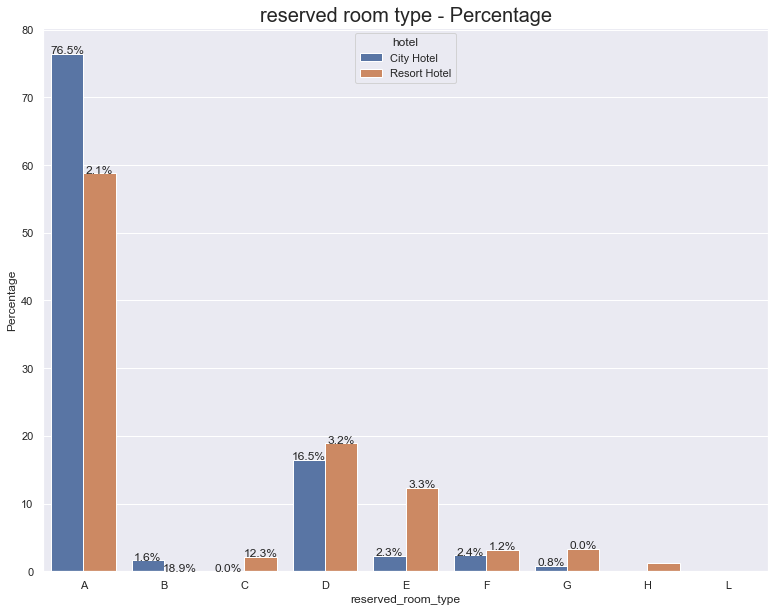

In [44]:
import numpy as np

plt.figure(figsize=(13, 10))
sns.set(style="darkgrid")
plt.title("reserved room type - Percentage", fontdict={'fontsize': 20})

# Get the percentage of each deposit type for each hotel
g = data.groupby(["hotel", "reserved_room_type"]).size().reset_index(name="counts")
g["percentage"] = 100 * g["counts"] / g.groupby(["hotel"])["counts"].transform("sum")

# Make the bar plot
ax = sns.barplot(x="reserved_room_type", y="percentage", hue="hotel", data=g)

# Display the percentage value on top of each bar
for patch, pct in zip(ax.patches, g["percentage"]):
    x = patch.get_x() + patch.get_width() / 2
    height = patch.get_height()
    ax.text(x, height, '{:.1f}%'.format(pct), ha='center')

plt.ylabel("Percentage")


* Room Type A are the most booked room in city and resort hotel
* Side Note : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

### 9. Lead Time distribution

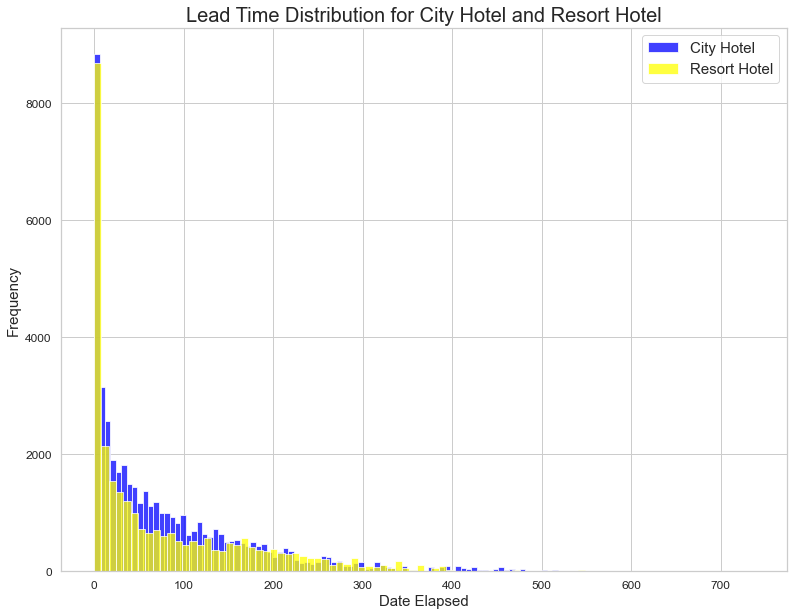

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
sns.set_style("whitegrid")

plt.title("Lead Time Distribution for City Hotel and Resort Hotel", fontdict={'fontsize': 20})

sns.histplot(data[data["hotel"] == "City Hotel"]["lead_time"], color='blue', kde=False, label="City Hotel")
sns.histplot(data[data["hotel"] == "Resort Hotel"]["lead_time"], color='yellow', kde=False, label="Resort Hotel")

plt.xlabel("Date Elapsed", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Frequency", fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)


In [46]:
numericals = ['lead_time']

In [47]:
# numerical statistical sumary
data.groupby('hotel')[numericals].describe()

lead_time                                                     
                 count       mean        std  min   25%   50%    75%    max
hotel                                                                      
City Hotel     46228.0  80.702734  89.863028  0.0  12.0  50.0  121.0  518.0
Resort Hotel   28938.0  78.837618  93.057146  0.0   5.0  38.0  131.0  737.0

* Its looks like that most of people has zero lead time,the lead time is dominated by 0 days and with a span of time from 0 days to 400 days

### 10. Total special request by guest

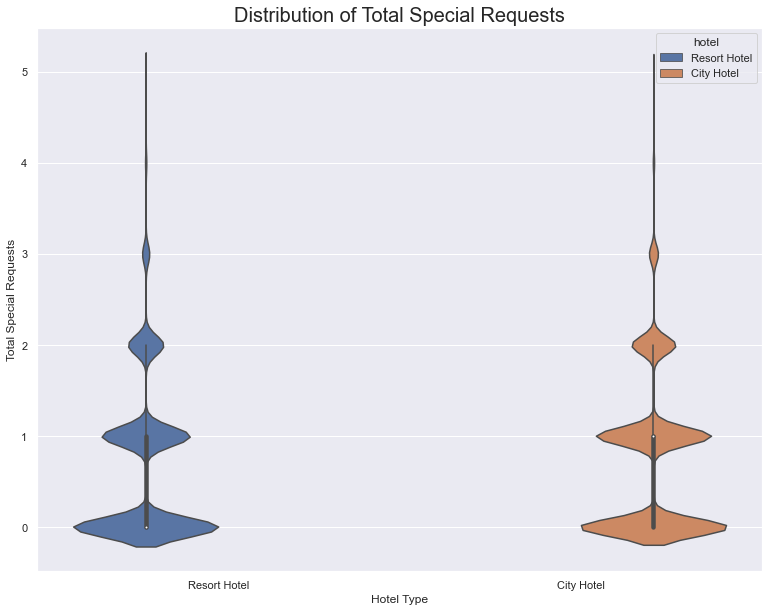

In [48]:
sns.set_style("darkgrid")
plt.figure(figsize=(13, 10))

sns.violinplot(x='hotel', y='total_of_special_requests', data=data, hue='hotel')
plt.title("Distribution of Total Special Requests", fontdict={'fontsize': 20})
plt.ylabel("Total Special Requests")
plt.xlabel("Hotel Type")

plt.show()


* Most of guest in resort nor city hotel has less than 3 request

### 11. Proportion of Bookings per Agent

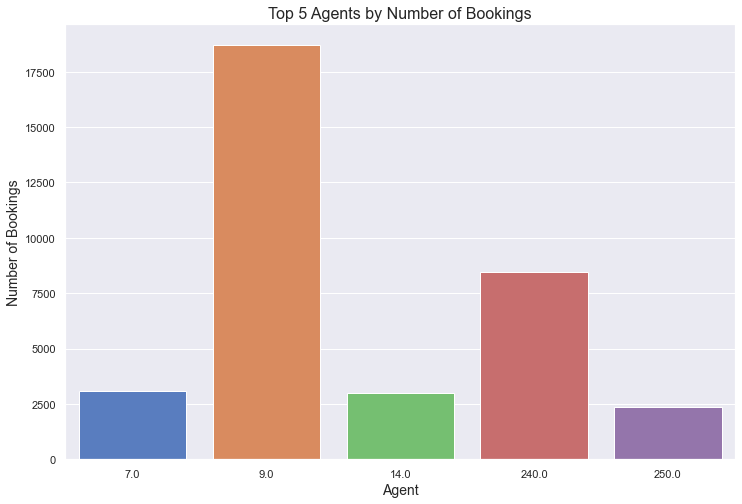

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# Get the top 5 agents by number of bookings
top_agents = data['agent'].value_counts().head(5)

# Create a barplot of the top 5 agents
sns.barplot(x=top_agents.index, y=top_agents.values, palette='muted')

# Set the x-label and y-label
plt.xlabel('Agent', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)

# Set the title
plt.title('Top 5 Agents by Number of Bookings', fontsize=16)

# Display the plot
plt.show()


* Agent id 9 has the most booked agent

In [50]:
hotel_cln.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,0,2,0.0,0,BB,...,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,0,2,0.0,0,BB,...,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,1,1,0.0,0,BB,...,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,1,1,0.0,0,BB,...,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,2,2,0.0,0,BB,...,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,2015-07-03


# 4.Modeling Section

In [51]:
#checking information of dataset
hotel_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119206 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119206 non-null  object 
 1   is_canceled                     119206 non-null  int64  
 2   lead_time                       119206 non-null  int64  
 3   arrival_date_year               119206 non-null  int64  
 4   arrival_date_month              119206 non-null  object 
 5   stays_in_week_nights            119206 non-null  int64  
 6   adults                          119206 non-null  int64  
 7   children                        119206 non-null  float64
 8   babies                          119206 non-null  int64  
 9   meal                            119206 non-null  object 
 10  country                         119206 non-null  object 
 11  market_segment                  119206 non-null  object 
 12  is_repeated_gues

### 4.1. One - hot encoding

In [52]:
df = hotel_cln.copy()

In [53]:
#one-hot-encoding
df = pd.get_dummies(data = df, columns = ['meal', 'market_segment', 'reserved_room_type', 
                                          'customer_type','deposit_type'])

In [54]:
# There are more than 300 classes, so I wanted to use label encoder on this feature.
df['country'] = le.fit_transform(df['country']) 

In [55]:
df['arrival_date_month'] = df['arrival_date_month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


In [56]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [57]:
df['hotel'] = df['hotel'].replace(['Resort Hotel', 'City Hotel'], [0, 1])


In [58]:
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day

In [59]:
#Because we already split column reservation_status_date into 3 column (date,month,year) we will drop this column
df = df.drop('reservation_status_date', axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119206 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119206 non-null  int64  
 1   is_canceled                     119206 non-null  int64  
 2   lead_time                       119206 non-null  int64  
 3   arrival_date_year               119206 non-null  int64  
 4   arrival_date_month              119206 non-null  int64  
 5   stays_in_week_nights            119206 non-null  int64  
 6   adults                          119206 non-null  int64  
 7   children                        119206 non-null  float64
 8   babies                          119206 non-null  int64  
 9   country                         119206 non-null  int32  
 10  is_repeated_guest               119206 non-null  int64  
 11  previous_cancellations          119206 non-null  int64  
 12  previous_booking

### 4.2. Feature Importance with Random Forest Classifier

In [61]:
X = df.drop(["is_canceled"], axis=1)
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [62]:
# Create a RandomForestClassifier object
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Text(0.5, 0, 'Feature Importances (%)')

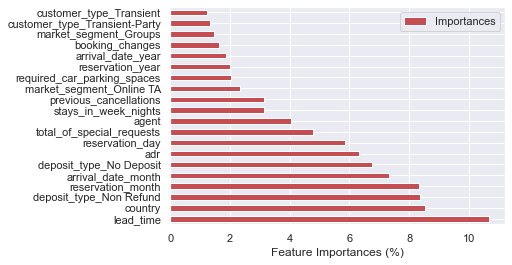

In [63]:
pd.DataFrame(data = clf.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

* Feature importance was determined using a Random Forest classifier
* The top five most important features were lead_time, country, reservation_month, Deposit_type and arrival_date_month with lead_time having the highest importance score of 9.9
* lead_time being the most important feature suggests that it has the largest impact on the outcome of the model.
* The number of days that elapsed between the entering date of the booking into the PMS and the arrival date is used in hotels, resorts, vacation rental properties and other types of accommodation businesses as a measure of how early or late a booking is made. It could be used as a feature for predicting the cancellation of a reservation or as a variable in pricing strategies.

In [64]:
feature_importances = clf.feature_importances_
feature_names = X_train.columns

# create an empty dataframe with columns "Importances" and "Features"
df = pd.DataFrame(columns=["Importances", "Features"])

# add the feature importances and feature names to the dataframe
df["Importances"] = feature_importances
df["Features"] = feature_names

# sort the dataframe by importances in descending order
df = df.sort_values("Importances", ascending=False)

df.head(10)

,Importances,Features
1,0.106879,lead_time
8,0.085368,country
44,0.083662,deposit_type_Non Refund
47,0.083249,reservation_month
3,0.073241,arrival_date_month
43,0.067511,deposit_type_No Deposit
16,0.063278,adr
48,0.058651,reservation_day
18,0.047868,total_of_special_requests
13,0.040321,agent


In [65]:
#Define best column
best_col = ['lead_time', 'country', 'reservation_month', 'deposit_type_No Deposit', 'arrival_date_month', 'deposit_type_Non Refund',
           'adr','reservation_day','total_of_special_requests','agent']
X_best = X[best_col]

### 4.3. Training and Testing Data

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best,y,stratify=y,test_size=0.30,random_state=42)

### 4.4. Determining Model (Imbalanced Data)

In [67]:
#Decision tree Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#Check Score
dtc.score(X_test, y_test)


0.912141379117499

In [68]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Check Score
rf.score(X_test,y_test)

0.943347687489514

In [69]:
#XGboost model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

#Check score
xgb_classifier.score(X_test,y_test)

0.9428163972932163

In [70]:
#KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

#Check score
knn_classifier.score(X_test,y_test)

0.8027235613220737

* Random Forest has slightly better accuracy than XGBoost by 0.0010%

### 4.5. Imbalanced Data handling

In [71]:
target = hotel_cln['is_canceled'].value_counts().reset_index()
target.rename(columns={'index':'is_canceled','is_canceled':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,is_canceled,freq,percentage
0,0,75011,62.93
1,1,44195,37.07


* There are less guest that cancel the booking
* Our data is considering have mild imbalance according to google https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data
* Lets try to do SMOTE data imbalance handling and check accuracy before and after doing it

#### Make another copies of df so it wont affect previously df

In [72]:
df_imba = hotel_cln.copy()

In [73]:
#one-hot-encoding
df_imba = pd.get_dummies(data = df_imba, columns = ['meal', 'market_segment', 'reserved_room_type', 
                                          'customer_type','deposit_type'])

In [74]:
# There are more than 300 classes, so I wanted to use label encoder on this feature.
df_imba['country'] = le.fit_transform(df_imba['country']) 

In [75]:
df_imba['arrival_date_month'] = df_imba['arrival_date_month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


In [76]:
df_imba["reservation_status_date"] = pd.to_datetime(df_imba["reservation_status_date"])

In [77]:
df_imba['hotel'] = df_imba['hotel'].replace(['Resort Hotel', 'City Hotel'], [0, 1])


In [78]:
df_imba['reservation_year'] = df_imba['reservation_status_date'].dt.year
df_imba['reservation_month'] = df_imba['reservation_status_date'].dt.month
df_imba['reservation_day'] = df_imba['reservation_status_date'].dt.day

In [79]:
#Because we already split column reservation_status_date into 3 column (date,month,year) we will drop this column
df_imba = df_imba.drop('reservation_status_date', axis=1)

In [80]:
df_imba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119206 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119206 non-null  int64  
 1   is_canceled                     119206 non-null  int64  
 2   lead_time                       119206 non-null  int64  
 3   arrival_date_year               119206 non-null  int64  
 4   arrival_date_month              119206 non-null  int64  
 5   stays_in_week_nights            119206 non-null  int64  
 6   adults                          119206 non-null  int64  
 7   children                        119206 non-null  float64
 8   babies                          119206 non-null  int64  
 9   country                         119206 non-null  int32  
 10  is_repeated_guest               119206 non-null  int64  
 11  previous_cancellations          119206 non-null  int64  
 12  previous_booking

In [81]:
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split 

#Split the dataframe and do undersampling, oversampling and oversampling with SMOTE
X = df_imba.drop(['is_canceled'],axis=1)
y = df_imba['is_canceled']
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [82]:
#Undersampling
df_undersampling = pd.concat([X_under, y_under], axis=1)
df_undersampling.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_year,reservation_month,reservation_day,is_canceled
0,1,0,2016,10,1,2,0.0,0,56,0,...,0,1,0,1,0,0,2016,10,31,0
1,1,45,2017,4,3,2,0.0,0,59,0,...,0,1,0,1,0,0,2017,4,7,0
2,0,21,2017,8,3,2,0.0,0,135,0,...,0,1,0,1,0,0,2017,8,25,0


In [83]:
#Oversampling
df_oversampling = pd.concat([X_over, y_over], axis=1)
df_oversampling.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_year,reservation_month,reservation_day,is_canceled
0,1,1,2015,10,2,2,0.0,0,123,0,...,0,1,0,1,0,0,2015,10,8,0
1,1,29,2016,1,4,2,0.0,0,59,0,...,0,1,0,1,0,0,2016,1,18,1
2,0,56,2015,10,5,2,2.0,0,76,0,...,0,1,0,1,0,0,2015,10,20,0


In [84]:
#Oversampling with SMOTE
df_oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_smote.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_year,reservation_month,reservation_day,is_canceled
0,1,1,2015,10,2,2,0.0,0,123,0,...,0,1,0,1,0,0,2015,10,8,0
1,1,29,2016,1,4,2,0.0,0,59,0,...,0,1,0,1,0,0,2016,1,18,1
2,0,56,2015,10,5,2,2.0,0,76,0,...,0,1,0,1,0,0,2015,10,20,0


#### Check how data distributed

In [85]:
df_undersampling['is_canceled'].value_counts()

0    30797
1    30797
Name: is_canceled, dtype: int64

In [86]:
df_oversampling['is_canceled'].value_counts()

0    52647
1    52647
Name: is_canceled, dtype: int64

In [87]:
df_oversampling_smote['is_canceled'].value_counts()

0    52647
1    52647
Name: is_canceled, dtype: int64

In [88]:
sm = over_sampling.SMOTE(random_state=42)

X = df_imba.drop(['is_canceled'],axis = 1)
y = df_imba['is_canceled']
X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (119206, 49)
Shape of X after SMOTE: (150022, 49)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: is_canceled, dtype: float64

#### Lets split our balanced dataset and lets try to run some of classifiers

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

### 4.6. Dertemining Model (Balanced Data)

In [90]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Check Score
rf.score(X_test,y_test)

0.9465416490768103

In [91]:
#XGboost model

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

#Check score
xgb_classifier.score(X_test,y_test)

0.9519185904414869

In [92]:
#KNN model

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

#Check score
knn_classifier.score(X_test,y_test)

0.8290265958628658

* So with imbalanced data handling we get more 1% in accuracy in XGB and 2% in KNN

### 4.7. Hypertuning parameter with Random forest & XGBoost

#### HP with Random Forest

In [93]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [94]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall because we want to Predicted Negative but was Positive
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [95]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'max_depth': 5, 'n_estimators': 40}",0.721980,1
22,"{'max_depth': 5, 'n_estimators': 30}",0.716106,2
20,"{'max_depth': 5, 'n_estimators': 10}",0.712056,3
24,"{'max_depth': 5, 'n_estimators': 50}",0.708691,4
21,"{'max_depth': 5, 'n_estimators': 20}",0.708197,5
18,"{'max_depth': 4, 'n_estimators': 40}",0.675747,6
15,"{'max_depth': 4, 'n_estimators': 10}",0.674683,7
4,"{'max_depth': 1, 'n_estimators': 50}",0.670975,8
16,"{'max_depth': 4, 'n_estimators': 20}",0.670672,9
19,"{'max_depth': 4, 'n_estimators': 50}",0.662858,10


In [96]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83     22600
           1       0.89      0.72      0.79     22407

    accuracy                           0.81     45007
   macro avg       0.83      0.81      0.81     45007
weighted avg       0.82      0.81      0.81     45007



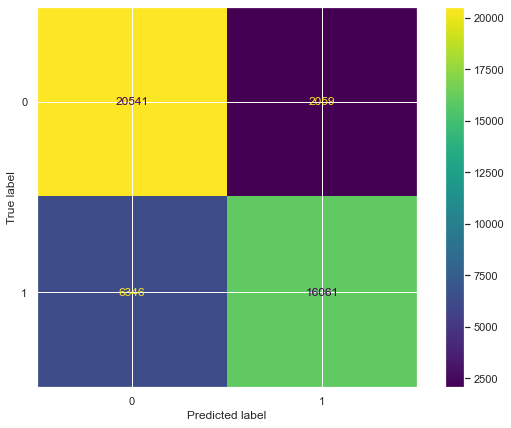

In [97]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

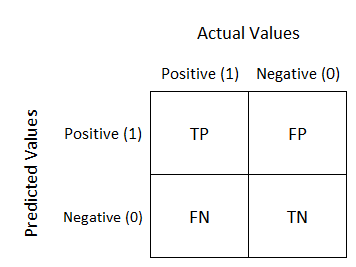

* After tuning Random Forest only get 72% Recall rate

#### HP with XGBoost

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# Set up the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [10, 50, 100],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Create the XGBoost classifier
xgb = XGBClassifier()

# Set up the random search
random_search = RandomizedSearchCV(xgb, param_grid, n_iter=5, cv=5, scoring='recall', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(random_search.best_params_)
print(random_search.best_score_)

{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8}
0.9098357259769795


In [99]:
# classification report
from sklearn.metrics import classification_report
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     22600
           1       0.97      0.91      0.94     22407

    accuracy                           0.94     45007
   macro avg       0.94      0.94      0.94     45007
weighted avg       0.94      0.94      0.94     45007



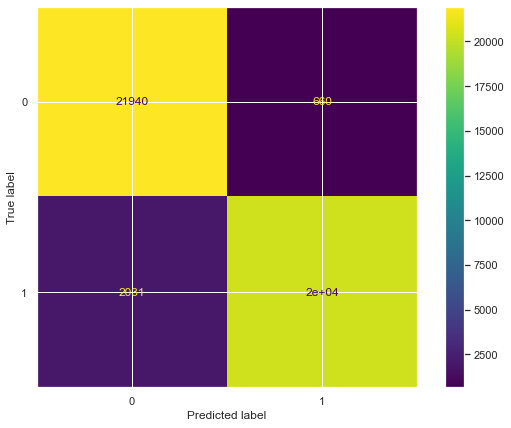

In [100]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = random_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=random_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=random_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

### 4.8. Conclusion
* After tuning XGBoost to get 91% Recall this makes XGBoost the best algorithm for determining the results of the dataset
* However, when using CVgridsearch XGBoost without being randomized, the process takes a very long time
* The model is neither underfit nor overfit because of the high precision and recall scores

### 4.9. ROC AUC Score

In [101]:
y_pred_train = random_search.predict(X_train)
y_pred_test = random_search.predict(X_test)
y_proba_train = random_search.predict_proba(X_train)[:,1]
y_proba_test = random_search.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [102]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [103]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]

In [104]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))


Train Confusion Matrix
[[51020  1391]
 [ 4486 48118]]
Test Confusion Matrix
[[21940   660]
 [ 2031 20376]]

Area Under Curve
AUC train & test        : 98.68% & 98.46%

Confusion Matrix Evaluation
Accuracy train & test   : 94.40% & 94.02%
Recall train & test     : 91.47% & 90.94%
Specificity train & test: 97.35% & 97.08%
Precision train & test  : 97.19% & 96.86%
F1 Score train & test   : 94.24% & 93.81%
Log Loss train & test   : 1.9329 & 2.0651


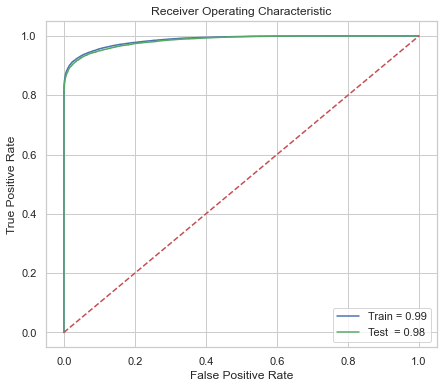

In [105]:
# Print all the evaluation metrics
sns.set_style("whitegrid")
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))

#create plot of ROC_AUC
plt.figure(figsize=(7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


* Based on the numbers given, the model has a good performance in terms of AUC and accuracy, with AUC scores of 98.68% on the training set and 98.46% on the test set, and accuracy scores of 94.40% on the training set and 94.02% on the test set. The recall, specificity, precision, and F1 score are also high, indicating that the model is able to make correct predictions for both positive and negative classes. The log loss is relatively low, indicating a good performance in terms of error.